In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

In [5]:
data = pd.read_csv("drug_consumption.csv")
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [6]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [7]:
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

Text(0, 0.5, 'Usage')

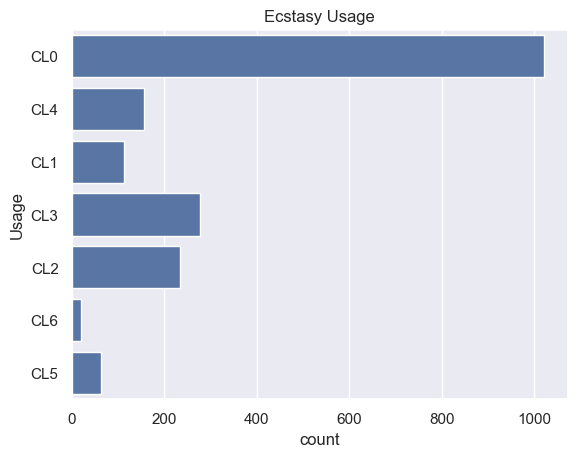

In [331]:
ecstasy = data['Ecstasy']

counts = sns.countplot(ecstasy)
counts.set_title("Ecstasy Usage")
counts.set_ylabel("Usage")

In [9]:
y = data['Cannabis']
x1 = data.drop(columns=['Cannabis'])

In [85]:
# replacement_dict = {
#     'CL0': 'Never Used',
#     'CL1': 'Used over a Decade Ago',
#     'CL2': 'Used in Last Decade',
#     'CL3': 'Used in Last Year',
#     'CL4': 'Used in Last Month',
#     'CL5': 'Used in Last Week',
#     'CL6': 'Used in Last Day'
# }

replacement_dict = {
    'CL0': 0,
    'CL1': 0,
    'CL2': 0,
    'CL3': 1,
    'CL4': 1,
    'CL5': 1,
    'CL6': 1
}


new_y = [replacement_dict[item] if item in replacement_dict else item for item in y]

print(new_y)

x1 = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]


[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [86]:
x = sm.add_constant(x1)
reg_log = sm.Logit(new_y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.402767
         Iterations 7


In [87]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1885
Model:                          Logit   Df Residuals:                     1872
Method:                           MLE   Df Model:                           12
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.4174
Time:                        19:43:52   Log-Likelihood:                -759.22
converged:                       True   LL-Null:                       -1303.2
Covariance Type:            nonrobust   LLR p-value:                2.271e-225
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0951      0.181      6.053      0.000       0.740       1.450
Age           -0.8323      0.081    -10.298      0.000      -0.991      -0.674
Gender        -0.6947      0.143     -4.844      0.000      -0.976      -0.414
Education     -0.3820      0.070     -5.419      0.000      -0.520      -0.244
Country       -1.1683      0.103    -11.288      0.000      -1.371      -0.965
Ethnicity      1.0346      0.517      2.001      0.045       0.021       2.048
Nscore        -0.1215      0.080     -1.522      0.128      -0.278       0.035
Escore        -0.1333      0.084     -1.578      0.115      -0.299       0.032
Oscore         0.6201      0.080      7.750      0.000       0.463       0.777
Ascore         0.0709      0.071      0.993      0.321      -0.069       0.211
Cscore        -0.3518      0.080     -4.390      0.000      -0.509      -0.195
Impulsive     -0.0815      0.089     -0.912      0.362      -0.257       0.094
SS             0.5922      0.098      6.048      0.000       0.400       0.784
==============================================================================
"""

In [88]:
results_log.predict()


array([0.15559604, 0.50896714, 0.40237121, ..., 0.56256203, 0.97939732,
       0.96331674])

In [89]:
np.array(data['Ecstasy'])

array(['CL0', 'CL4', 'CL0', ..., 'CL4', 'CL3', 'CL3'], dtype=object)

In [90]:
results_log.pred_table()

array([[736., 150.],
       [182., 817.]])

In [91]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,736.0,150.0
Actual 1,182.0,817.0


In [92]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.8238726790450929

In [106]:
for drug in list(data.columns[13:]):
    y = data[drug]
    x1 = data.drop(columns=[drug])

    x1 = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

    new_y = [replacement_dict[item] if item in replacement_dict else item for item in y]

    x = sm.add_constant(x1)
    reg_log = sm.Logit(new_y,x)
    results_log = reg_log.fit()

    results_log.predict()

    results_log.pred_table()

    cm_df = pd.DataFrame(results_log.pred_table())
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
    print(cm_df)
    
    cm = np.array(cm_df)
    accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
    print(f"{drug} Accuracy: {accuracy_train}")

Optimization terminated successfully.
         Current function value: 0.241126
         Iterations 7
          Predicted 0  Predicted 1
Actual 0          0.0        136.0
Actual 1          0.0       1749.0
Alcohol Accuracy: 0.9278514588859417
Optimization terminated successfully.
         Current function value: 0.409678
         Iterations 7
          Predicted 0  Predicted 1
Actual 0       1327.0        122.0
Actual 1        257.0        179.0
Amphet Accuracy: 0.7989389920424403
Optimization terminated successfully.
         Current function value: 0.224109
         Iterations 8
          Predicted 0  Predicted 1
Actual 0       1751.0          1.0
Actual 1        133.0          0.0
Amyl Accuracy: 0.9289124668435014
Optimization terminated successfully.
         Current function value: 0.491747
         Iterations 6
          Predicted 0  Predicted 1
Actual 0       1203.0        147.0
Actual 1        317.0        218.0
Benzos Accuracy: 0.7538461538461538
Optimization terminated succe

/Users/cameronbayer/anaconda3/envs/drug_class/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [323]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import tensorflow as tf


y = data['Benzos']
x1 = data.drop(columns=['Benzos'])



categories = list(y)

category_tensor = tf.constant(categories)

lookup_layer = tf.keras.layers.StringLookup(output_mode='int')

lookup_layer.adapt(category_tensor)

category_indices = lookup_layer(category_tensor)

one_hot_encoded = tf.one_hot(category_indices, depth=lookup_layer.vocabulary_size())

print(one_hot_encoded)



x1 = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

X_train, X_test, y_train, y_test = train_test_split(x1, np.array(one_hot_encoded), train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size=0.5)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]], shape=(1885, 8), dtype=float32)


In [324]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


model = keras.Sequential([ 
    layers.Dense(126, activation='relu', input_shape=[12]),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(126, activation='relu'),
    layers.Dropout(rate=0.3), 
    layers.BatchNormalization(),
    layers.Dense(126, activation='relu'),
    layers.Dropout(rate=0.3), 
    layers.BatchNormalization(),
    layers.Dense(126, activation='relu'),
    layers.Dropout(rate=0.3), 
    layers.BatchNormalization(),
    layers.Dense(126, activation='relu'),
    layers.Dropout(rate=0.3), 
    layers.BatchNormalization(),
    layers.Dense(8, activation='softmax'),
])

/Users/cameronbayer/Desktop/Stuff/Data Science/Projects/Drug_Consumption_Classification/drug_consumption/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [325]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [326]:
history = model.fit(
    X_train.to_numpy(), np.array(y_train),
    validation_data=(X_valid.to_numpy(), np.array(y_valid)),
    batch_size=250,
    epochs=200,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1
)

Epoch 1/200


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1306 - loss: 2.7110 - val_accuracy: 0.4628 - val_loss: 2.0271
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1764 - loss: 2.5269 - val_accuracy: 0.4894 - val_loss: 1.9731
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2031 - loss: 2.4422 - val_accuracy: 0.4894 - val_loss: 1.9197
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2259 - loss: 2.2985 - val_accuracy: 0.4894 - val_loss: 1.8684
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2511 - loss: 2.2906 - val_accuracy: 0.4894 - val_loss: 1.8237
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2788 - loss: 2.2527 - val_accuracy: 0.4894 - val_loss: 1.7850
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3022 - loss: 2.1643 - val_accuracy: 0.4894 - val_loss: 1.7510
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3402 - loss: 2.0923 - val_accuracy: 0.4894 - val_loss: 1.7215
Epoch 9/200

Minimum validation loss: 1.3846526145935059


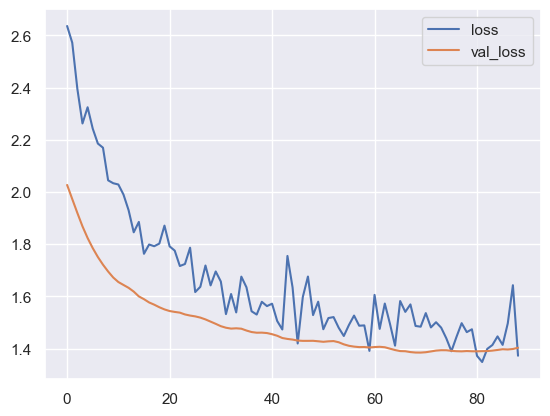

In [327]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot()

print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [328]:
predicted = model.predict(X_test.to_numpy()) 

np.set_printoptions(suppress=True, precision=4)

print(predicted)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[0.0096 0.5697 0.0793 ... 0.1062 0.0303 0.0288]
 [0.0066 0.8276 0.0221 ... 0.0296 0.0141 0.0126]
 [0.0065 0.6315 0.0756 ... 0.0886 0.0237 0.0196]
 ...
 [0.0142 0.0946 0.1113 ... 0.0243 0.2017 0.1977]
 [0.0053 0.5963 0.0837 ... 0.1001 0.0248 0.0307]
 [0.0134 0.0941 0.1899 ... 0.0583 0.1918 0.1105]]


In [329]:
loss, accuracy = model.evaluate(X_valid.to_numpy(), np.array(y_valid), verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 50.53%


In [333]:
print(predicted[1])
print(y_test[1])

[0.0066 0.8276 0.0221 0.0659 0.0214 0.0296 0.0141 0.0126]
[0. 1. 0. 0. 0. 0. 0. 0.]
